## The single flavor approximation

After manipulating the Boltzamann equations, we can consider the single flavor approxiamtion for the type-II leptogenesis scenario where the heavy scalar triplet decays into a lepton pair. For such an approach, we have $Y_{\Sigma \Delta} = Y_\Delta + Y_{\Delta^{*}}$ and $Y_{\Delta(B-L)}$, which are related by 
$$ sHz\frac{dY_{\Sigma \Delta}}{dz} =\gamma_D \left(\frac{Y_{\Sigma \Delta}}{Y_{\Sigma \Delta}^{eq}}-1\right)-2\gamma_A \left(\left (\frac{Y_{\Sigma \Delta}}{Y_{\Sigma \Delta}^{eq}}\right)^2-1\right) $$

$$sHz\frac{dY_{\Delta(B-L)}}{dz} = -\gamma_D \epsilon_\Delta \left(\frac{Y_{\Sigma \Delta}}{Y_{\Sigma \Delta}^{eq}}-1\right)- 2\gamma_DB_\ell \left(\frac{Y_{\Delta(B-L)}}{Y_\ell^{eq}}-\frac{Y_{\Delta \Delta}}{Y_{\Sigma \Delta}^{eq}}\right),$$

$$sHz\frac{dY_{\Delta\Delta}}{dz} = -\gamma_D\left(\frac{Y_{\Delta\Delta}}{Y_{\Sigma\Delta}^{eq}}-B_\ell\frac{Y_{\Delta(B-L)}}{Y_\ell^{eq}}-B_H \frac{g^H(Y_{\Delta(B-L)}, Y_{\Delta\Delta})}{Y_H^{eq}}\right)$$

where, according to the paper [Flavor always matters in scalar triplet leptogenesis](https://arxiv.org/pdf/1503.00629), 

$$ g^H(Y_{\Delta(B-L)}, Y_{\Delta\Delta})= -(Y_{\Delta(B-L)}+2Y_{\Delta\Delta})$$
$$ Y_{\Sigma \Delta}^{eq} = \frac{135}{2\pi^4 g_{*}}z^2 \mathcal{K}_2(z),$$ 
$$ Y_\ell^{eq} = \frac{15 g_\ell \zeta_\ell}{8\pi^2 g_{*}} = \frac{15}{4\pi^2 g_{*}}$$
$$ Y_H^{eq} = \frac{15 g_H \zeta_H}{8\pi^2 g_{*}} = \frac{15}{2\pi^2 g_{*}}$$
$$ \frac{\gamma_D}{sHz} = s Y_{\Sigma \Delta}^{eq} \Gamma_\Delta \frac{\mathcal{K}_1(z)}{\mathcal{K}_2(z)} \frac{1}{sHz}=\frac{135z^3 \mathcal{K}_1(z)}{2\pi^5 g_{*}^{3/2}}\frac{3\sqrt{10}M_{Pl}\Gamma_\Delta}{M_\Delta^2}$$
$$ -\frac{2 \gamma_A}{sHz} = -\frac{1.1007\times 10^{16}\text{GeV}}{g_{*}^{3/2}M_\Delta} e^{-1.49z^{1.0735}}.$$

$\mathcal{K}_1$ and $\mathcal{K}_2$ are the modified Bessel functions of the second kind for, respectively, $n=1$ and $n=2$.

Here we consider $g_{*} = 106.75$ and we use $M_\Delta = 10^{12}$ GeV and $M_{Pl} = 2.44 \times 10^{18}$ GeV. In the one flavor approximation, we can take $|\mu|=0.1 M_\Delta$ and 
$$ \lambda_\ell^2 = \frac{\text{Tr}(ff^\dagger)}{\text{Tr}(ff^\dagger)+|\mu|^2/M_\Delta^2}\;\;\text{and}\;\; \lambda_H^2 = \frac{|\mu|^2/M_\Delta^2}{\text{Tr}(ff^\dagger)+|\mu|^2/M_\Delta^2}$$
to obey $\lambda_H \gg \lambda_\ell$, which takes the total decay rate 
$$ \Gamma_\Delta = \frac{M_\Delta}{8\pi}\left(\text{Tr}(ff^\dagger)+\frac{|\mu|^2}{M_\Delta^2}\right) \approx \frac{10^{10}}{8\pi}\text{GeV}$$

In [1]:
from timeit import default_timer as timer
import numpy as np
import math as mh
import scipy.integrate as sci
from scipy.integrate import solve_ivp, odeint, quad
from scipy.optimize import root
import matplotlib.pyplot as plt
from scipy.special import kv, zeta #modified Bessel function
# plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "Computer modern"
# })
from numpy import pi, exp, log, sqrt, inf

In [2]:
g_star = 106.75
M_Delta = 10e12 #GeV
M_Pl = 2.44*10e18 #Reduced Planck mass in GeV
Gamma_Delta = (10e10)/(8*pi) #GeV

#equilibrium Y_{\Sigma \Delta}
def Sigma_Delta_eq(z):
    return (135/(g_star*2*pi**4))*(z**2)*kv(2,z)

Sigma_Delta_0 = Sigma_Delta_eq(10e-4)

Let us use 
$$ \epsilon_\Delta \sim 10^{-8}.$$

In [3]:
#definition of the decay intensity D = \gamma_D/(sHz)
def D(z): 
    return (135*z**3/((g_star**1.5)*2*pi**5))*kv(1,z)*3*sqrt(10)*M_Pl*Gamma_Delta/M_Delta**2

#definition of the gauge scattering reactiong density A = 2\gamma_A/(sHz)

# def s_A(x): #gauge interactions reduced cross section 
#     g2, gy = 0.629664, 0.420313
#     a = sqrt(x)*sqrt(x-4)*(96*g2**2*gy**2*(x+4)+gy**4*(65*x-68)+2*g2**4*(172+65*x))
#     b = -96*log((sqrt(x-4)*sqrt(x)+x)/2-1)*(4*g2**2*gy**2*(x-2)+gy**4*(x-2)+4*g2**4*(x-1))
#     return (a+b)*(1/(16*pi*x**2))

def entropy(z): 
    return 2*pi**2*106.75*M_Delta**3*z**3/(45)

def H(z):
    return (pi/(3*sqrt(10)))*(sqrt(106.75)*M_Delta**2/(z**2*M_Pl))

def A(z): 
    # integral, err = quad(lambda x: sqrt(x)*kv(1,z*sqrt(x))*s_A(x),4,inf)
    # return  2*(1/z*H(z)*entropy(z))*integral*M_Delta**4/(64*pi**4*z)
    return (2*5.5035*10**(15)/(106*75**1.5*M_Delta))*exp(-1.49*z**1.0735)

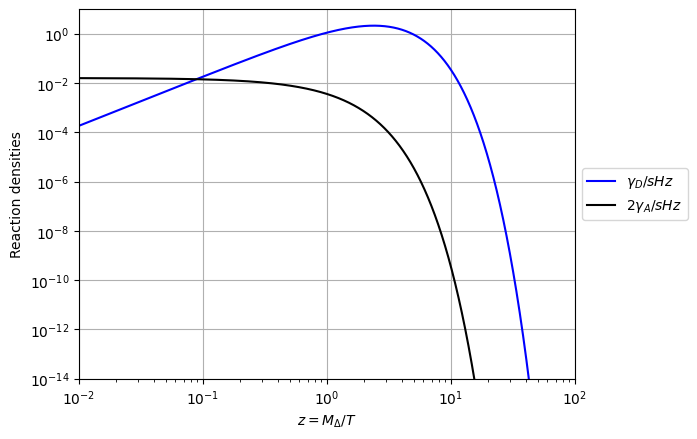

In [8]:
z_span = np.linspace(10**(-3),10**(3),10000000)

fig, ax = plt.subplots()
ax.plot(z_span, D(z_span), color = 'blue', label = r'$\gamma_D/sHz$')
ax.plot(z_span, A(z_span),color = 'black', label = r'$2 \gamma_A/sHz$')
ax.set_xlabel(r'$z=M_\Delta/T$')
ax.set_ylabel('Reaction densities')
ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim((10**(-14),10**(1)))
ax.set_xlim((10**(-2),100))
ax.grid()
plt.show()
fig.savefig('rection densites.pdf', bbox_inches='tight',dpi=500)

The oserved baryon abundance according to the CMB is $Y_B^{obs} = (8.70\pm 0.06)\times 10^{-11}$. The relaton between $Y_{\Delta(B-L)}$ and $Y_B$ is given by $$Y_B = \frac{28}{79}Y_{\Delta(B-L)} \to Y_{\Delta(B-L)}^{obs} = (2.45\pm0.02)\times 10^{-10}$$

# $Y_{\Sigma \Delta}(0) = 0$

In [52]:
#Boltzmann equation for Y_{B-L}, Y_{\sum \Delta} and Y_{\Delta \Delta}
start = timer()
def dY(z,Y): #Y[0] = Y_{\sum \Delta}, Y[1]= Y_{\Delta(B-L)} and Y[2]= Y_{\Delta \Delta}
    Y_H_eq = 15*2*2/(g_star*8*pi**2)
    Y_l_eq = 15*1*2/(g_star*8*pi**2)
    cp_asymm = 10**(-8)
    B_l = (0.1*M_Delta)**2/(8*pi*M_Delta*Gamma_Delta)
    B_H = 1-B_l
    return [-D(z)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
            -cp_asymm*D(z)*(Y[0]/Sigma_Delta_eq(z)-1)-2*D(z)*B_l*(Y[1]/Y_l_eq-Y[2]/Sigma_Delta_eq(z)),
            -D(z)*(Y[2]/Sigma_Delta_eq(z)-B_l*Y[1]/Y_l_eq+B_H*(Y[1]+2*Y[2])/Y_H_eq)]
    
z_span = np.linspace(10**(-3),10**(3),10000000)
    
general_sol_2 = odeint(dY,y0=[0,0,0],t=z_span,tfirst=True,rtol=10**(-14),atol=10**(-13))
end = timer()
print(end-start,'s')

0.16935260000173002 s


C:\Users\willb\AppData\Local\Temp\ipykernel_25992\1757815316.py:9: RuntimeWarning: overflow encountered in scalar power
  return [-D(z)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\1757815316.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  return [-D(z)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\1757815316.py:15: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  general_sol_2 = odeint(dY,y0=[0,0,0],t=z_span,tfirst=True,rtol=10**(-14),atol=10**(-13))


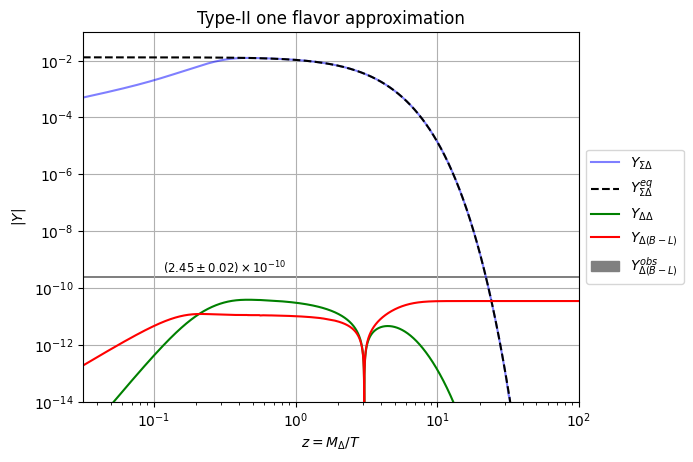

In [51]:
fig, ax = plt.subplots()
ax.plot(z_span, abs(general_sol_2.T[0]), color = 'blue',alpha=0.5, label = r'$Y_{\Sigma \Delta}$')
ax.plot(z_span, Sigma_Delta_eq(z_span), '--',color = 'black', label = r'$Y_{\Sigma \Delta}^{eq}$')
ax.plot(z_span, abs(general_sol_2.T[2]), color = 'green', label = r'$Y_{\Delta\Delta}$')
ax.plot(z_span, abs(general_sol_2.T[1]), color = 'red', label = r'$Y_{\Delta(B-L)}$')
ax.fill_between(np.linspace(10**(-4),10e2,100000),2.43*10**(-10),2.47*10**(-10),color = 'gray',
             label = r'$Y_{\Delta(B-L)}^{obs}$')
ax.text(10**(-0.5),10**(-9.3),r'$(2.45\pm0.02)\times 10^{-10}$',horizontalalignment='center',
        verticalalignment='center',fontsize = 'small')
ax.set_xlabel(r'$z=M_\Delta/T$')
ax.set_ylabel(r'$|Y|$')
ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(r'Type-II one flavor approximation')
ax.set_ylim((10**(-14),10**(-1)))
ax.set_xlim((10**(-1.5),100))
ax.grid()
plt.show()
fig.savefig('type 2 scalar abundance.pdf', bbox_inches='tight',dpi=500)

# $Y_{\Sigma \Delta}(0) = Y_{\Sigma \Delta}^{eq}(0)$

C:\Users\willb\AppData\Local\Temp\ipykernel_25992\1757815316.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  return [-D(z)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\1757815316.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  return [-D(z)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\1757815316.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  -cp_asymm*D(z)*(Y[0]/Sigma_Delta_eq(z)-1)-2*D(z)*B_l*(Y[1]/Y_l_eq-Y[2]/Sigma_Delta_eq(z)),
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\1757815316.py:10: RuntimeWarning: invalid value encountered in scalar multiply
  -cp_asymm*D(z)*(Y[0]/Sigma_Delta_eq(z)-1)-2*D(z)*B_l*(Y[1]/Y_l_eq-Y[2]/Sigma_Delta_eq(z)),
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\1757815316.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  -D(z)*(Y[2

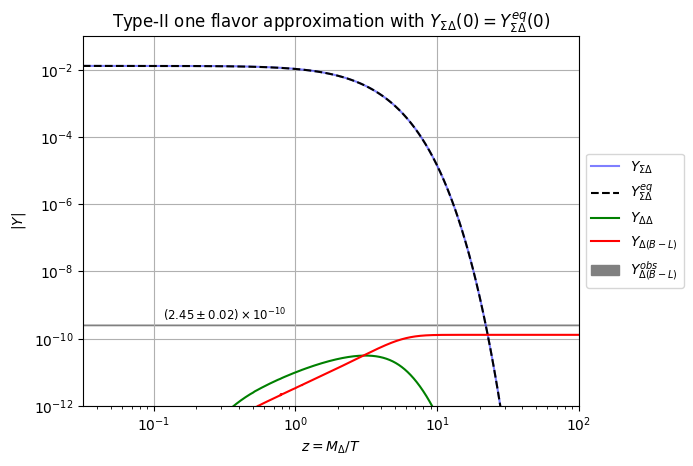

In [55]:
#Boltzmann equation for Y_{B-L}, Y_{\sum \Delta} and Y_{\Delta \Delta} with non null initial triplet abundance
z_span = np.linspace(10**(-3),10**(3),10000000)
    
general_sol_2_non_null = odeint(dY,y0=[Sigma_Delta_0,0,0],t=z_span,tfirst=True,rtol=10**(-14),atol=10**(-13))

#plot of the non null initial triplet abundance solution for different washout values
fig, ax = plt.subplots()
ax.plot(z_span, abs(general_sol_2_non_null.T[0]), color = 'blue',alpha=0.5, label = r'$Y_{\Sigma \Delta}$')
ax.plot(z_span, Sigma_Delta_eq(z_span), '--',color = 'black', label = r'$Y_{\Sigma \Delta}^{eq}$')
ax.plot(z_span, abs(general_sol_2_non_null.T[2]), color = 'green', label = r'$Y_{\Delta\Delta}$')
ax.plot(z_span, abs(general_sol_2_non_null.T[1]), color = 'red', label = r'$Y_{\Delta(B-L)}$')
ax.fill_between(np.linspace(10**(-4),10e2,100000),2.43*10**(-10),2.47*10**(-10),color = 'gray',
             label = r'$Y_{\Delta(B-L)}^{obs}$')
ax.text(10**(-0.5),10**(-9.3),r'$(2.45\pm0.02)\times 10^{-10}$',horizontalalignment='center',
        verticalalignment='center',fontsize = 'small')
ax.set_xlabel(r'$z=M_\Delta/T$')
ax.set_ylabel(r'$|Y|$')
ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(r'Type-II one flavor approximation with $Y_{\Sigma \Delta}(0) = Y_{\Sigma \Delta}^{eq}(0)$')
ax.set_ylim((10**(-12),10**(-1)))
ax.set_xlim((10**(-1.5),100))
ax.grid()
plt.show()
fig.savefig('type 2 scalar abundance - non null initial triplet scalar.pdf', bbox_inches='tight',dpi=500)

## Washout dependence for $Y_{\Sigma \Delta}(0) = 0$

What if we consider diffrent values of washout parameters similarly to what we have done in the type I scenario? The only dependence upon
$K_\Delta = \Gamma_\Delta/H(M_\Delta)$ comres from $\gamma_D$ under the form 
$$ \frac{\gamma_D}{sHZ} = \frac{zY_{\Sigma \Delta}^{eq}K_\Delta \mathcal{K}_1(z)}{\mathcal{K}_2(z)}$$

In [28]:
#Boltzmann equation solutions for different values of washout k_\Delta = {0.1,1,10,100}

def Dk(z,k): # gamma_D/(sHz) with the washout dependence
    return z*Sigma_Delta_eq(z)*k*kv(1,z)/kv(2,z)

#Washout K = 0.1
def dY1(z,Y): #Y[0] = Y_{\sum \Delta}, Y[1]= Y_{\Delta(B-L)} and Y[2]= Y_{\Delta \Delta}
    Y_H_eq = 15*2*2/(g_star*8*pi**2)
    Y_l_eq = 15*1*2/(g_star*8*pi**2)
    cp_asymm = 10**(-8)
    B_l = (0.1*M_Delta)**2/(8*pi*M_Delta*Gamma_Delta)
    B_H = 1-B_l
    return [-Dk(z,0.1)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
            -cp_asymm*Dk(z,0.1)*(Y[0]/Sigma_Delta_eq(z)-1)-2*Dk(z,0.1)*B_l*(Y[1]/Y_l_eq-Y[2]/Sigma_Delta_eq(z)),
            -Dk(z,0.1)*(Y[2]/Sigma_Delta_eq(z)-B_l*Y[1]/Y_l_eq+B_H*(Y[1]+2*Y[2])/Y_H_eq)]

#Washout K = 1
def dY2(z,Y): #Y[0] = Y_{\sum \Delta}, Y[1]= Y_{\Delta(B-L)} and Y[2]= Y_{\Delta \Delta}
    Y_H_eq = 15*2*2/(g_star*8*pi**2)
    Y_l_eq = 15*1*2/(g_star*8*pi**2)
    cp_asymm = 10**(-8)
    B_l = (0.1*M_Delta)**2/(8*pi*M_Delta*Gamma_Delta)
    B_H = 1-B_l
    return [-Dk(z,1)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
            -cp_asymm*Dk(z,1)*(Y[0]/Sigma_Delta_eq(z)-1)-2*Dk(z,1)*B_l*(Y[1]/Y_l_eq-Y[2]/Sigma_Delta_eq(z)),
            -Dk(z,1)*(Y[2]/Sigma_Delta_eq(z)-B_l*Y[1]/Y_l_eq+B_H*(Y[1]+2*Y[2])/Y_H_eq)]

#Washout K = 10
def dY3(z,Y): #Y[0] = Y_{\sum \Delta}, Y[1]= Y_{\Delta(B-L)} and Y[2]= Y_{\Delta \Delta}
    Y_H_eq = 15*2*2/(g_star*8*pi**2)
    Y_l_eq = 15*1*2/(g_star*8*pi**2)
    cp_asymm = 10**(-8)
    B_l = (0.1*M_Delta)**2/(8*pi*M_Delta*Gamma_Delta)
    B_H = 1-B_l
    return [-Dk(z,10)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
            -cp_asymm*Dk(z,10)*(Y[0]/Sigma_Delta_eq(z)-1)-2*Dk(z,10)*B_l*(Y[1]/Y_l_eq-Y[2]/Sigma_Delta_eq(z)),
            -Dk(z,10)*(Y[2]/Sigma_Delta_eq(z)-B_l*Y[1]/Y_l_eq+B_H*(Y[1]+2*Y[2])/Y_H_eq)]

#Washout K = 100
def dY4(z,Y): #Y[0] = Y_{\sum \Delta}, Y[1]= Y_{\Delta(B-L)} and Y[2]= Y_{\Delta \Delta}
    Y_H_eq = 15*2*2/(g_star*8*pi**2)
    Y_l_eq = 15*1*2/(g_star*8*pi**2)
    cp_asymm = 10**(-8)
    B_l = (0.1*M_Delta)**2/(8*pi*M_Delta*Gamma_Delta)
    B_H = 1-B_l
    return [-Dk(z,100)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
            -cp_asymm*Dk(z,100)*(Y[0]/Sigma_Delta_eq(z)-1)-2*Dk(z,100)*B_l*(Y[1]/Y_l_eq-Y[2]/Sigma_Delta_eq(z)),
            -Dk(z,100)*(Y[2]/Sigma_Delta_eq(z)-B_l*Y[1]/Y_l_eq+B_H*(Y[1]+2*Y[2])/Y_H_eq)]
    
z_span = np.linspace(10**(-3),10**(3),10000000)
    
sol_wahout_1 = odeint(dY1,y0=[0,0,0],t=z_span,tfirst=True,rtol=10**(-14),atol=10**(-13))
sol_wahout_2 = odeint(dY2,y0=[0,0,0],t=z_span,tfirst=True,rtol=10**(-14),atol=10**(-13))
sol_wahout_3 = odeint(dY3,y0=[0,0,0],t=z_span,tfirst=True,rtol=10**(-14),atol=10**(-13))
sol_wahout_4 = odeint(dY4,y0=[0,0,0],t=z_span,tfirst=True,rtol=10**(-14),atol=10**(-13))

C:\Users\willb\AppData\Local\Temp\ipykernel_25992\3484432309.py:13: RuntimeWarning: overflow encountered in scalar power
  return [-Dk(z,0.1)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\3484432309.py:13: RuntimeWarning: invalid value encountered in scalar multiply
  return [-Dk(z,0.1)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\3484432309.py:52: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  sol_wahout_1 = odeint(dY1,y0=[0,0,0],t=z_span,tfirst=True,rtol=10**(-14),atol=10**(-13))
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\3484432309.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return z*Sigma_Delta_eq(z)*k*kv(1,z)/kv(2,z)
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\3484432309.py:24: RuntimeWarning: divide by zero encountered in scalar di

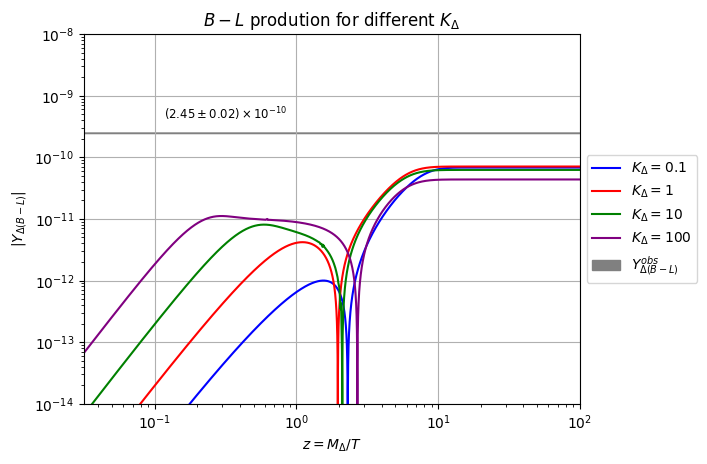

In [29]:
fig, ax = plt.subplots()
ax.plot(z_span, abs(sol_wahout_1.T[1]), color = 'blue', label = r'$K_\Delta = 0.1$')
ax.plot(z_span, abs(sol_wahout_2.T[1]), color = 'red', label = r'$K_\Delta = 1$')
ax.plot(z_span, abs(sol_wahout_3.T[1]), color = 'green', label = r'$K_\Delta = 10$')
ax.plot(z_span, abs(sol_wahout_4.T[1]), color = 'purple', label = r'$K_\Delta = 100$')
ax.fill_between(np.linspace(10**(-4),10e2,100000),2.43*10**(-10),2.47*10**(-10),color = 'gray',
             label = r'$Y_{\Delta(B-L)}^{obs}$')
ax.text(10**(-0.5),10**(-9.3),r'$(2.45\pm0.02)\times 10^{-10}$',horizontalalignment='center',
        verticalalignment='center',fontsize = 'small')
ax.set_xlabel(r'$z=M_\Delta/T$')
ax.set_ylabel(r'$|Y_{\Delta(B-L)}|$')
ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(r'$B-L$ prodution for different $K_\Delta$')
ax.set_ylim((10**(-14),10**(-8)))
ax.set_xlim((10**(-1.5),100))
ax.grid()
plt.show()
fig.savefig('B minus L for different washouts.pdf', bbox_inches='tight',dpi=500)

In [39]:
for i in range(len(z_span)):
    if 99.9999 < z_span[i] <= 100:
        print('i=',i,'z=',z_span[i])

i= 999990 z= 99.999910000891


In [42]:
K_span = np.linspace(0.001,1000,10000)

def dYk(z,Y,k,var): #Y[0] = Y_{\sum \Delta}, Y[1]= Y_{\Delta(B-L)} and Y[2]= Y_{\Delta \Delta}
    Y_H_eq = 15*2*2/(g_star*8*pi**2)
    Y_l_eq = 15*1*2/(g_star*8*pi**2)
    cp_asymm = 10**(-8)
    B_l = (0.1*M_Delta)**2/(8*pi*M_Delta*Gamma_Delta)
    B_H = 1-B_l
    return [-Dk(z,k)*(Y[0]/Sigma_Delta_eq(z)-1)-var*A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
            -cp_asymm*Dk(z,k)*(Y[0]/Sigma_Delta_eq(z)-1)-2*Dk(z,k)*B_l*(Y[1]/Y_l_eq-Y[2]/Sigma_Delta_eq(z)),
            -Dk(z,k)*(Y[2]/Sigma_Delta_eq(z)-B_l*Y[1]/Y_l_eq+B_H*(Y[1]+2*Y[2])/Y_H_eq)]

#B-L abundance in terms of the of the washout parameter K
Y_BminusL_K = np.zeros(len(K_span))

for i in range(len(K_span)):
    sol_wahout_i = odeint(dYk,y0=[0,0,0],t=z_span,args=(K_span[i],1),tfirst=True,rtol=10**(-14),atol=10**(-13))
    y = abs(sol_wahout_i.T[1])
    Y_BminusL_K[i] = y[999990]


C:\Users\willb\AppData\Local\Temp\ipykernel_25992\4085598195.py:9: RuntimeWarning: overflow encountered in scalar power
  return [-Dk(z,k)*(Y[0]/Sigma_Delta_eq(z)-1)-var*A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\4085598195.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  return [-Dk(z,k)*(Y[0]/Sigma_Delta_eq(z)-1)-var*A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\4085598195.py:17: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  sol_wahout_i = odeint(dYk,y0=[0,0,0],t=z_span,args=(K_span[i],1),tfirst=True,rtol=10**(-14),atol=10**(-13))
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\3484432309.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return z*Sigma_Delta_eq(z)*k*kv(1,z)/kv(2,z)
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\4085598195.py:9: RuntimeWarning: divide by zero enco

The efficiency for the type II leptogeneis scenario should then be given by 
$$ Y_{\Delta(B-L)}= \epsilon_\Delta \eta Y_{\Sigma \Delta}^{eq}(z\ll 1) = \epsilon_\Delta \eta Y_{\Sigma \Delta}^{eq,0}$$

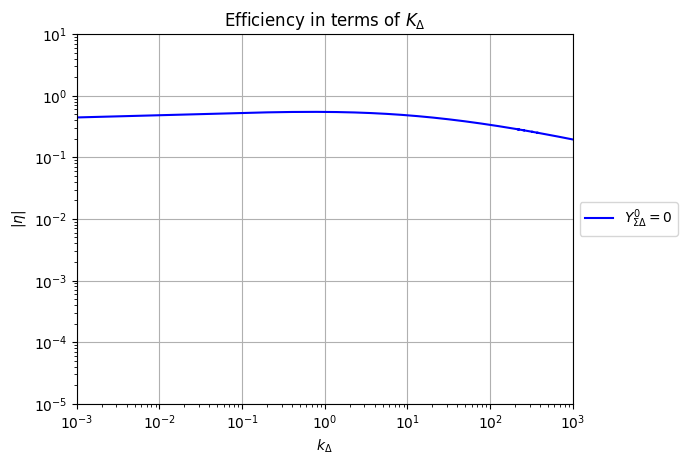

In [65]:
fig, ax = plt.subplots()
ax.plot(K_span, abs(Y_BminusL_K/(10**(-8)*Sigma_Delta_0)), color = 'blue', label = r'$Y_{\Sigma \Delta}^0=0$')
ax.set_xlabel(r'$k_\Delta$')
ax.set_ylabel(r'$|\eta|$')
ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(r'Efficiency in terms of $K_\Delta$')
ax.set_ylim((10**(-5),10**(1)))
ax.set_xlim((10**(-3),1000))
ax.grid()
plt.show()
fig.savefig('type II efficiency.pdf', bbox_inches='tight',dpi=500)

## Washout dependence for $Y_{\Sigma \Delta}(0) = Y_{\Sigma \Delta}^{eq}(0)$

In [56]:
#Boltzmann equation solutions for different values of washout k_\Delta = {0.1,1,10,100} for non null initial triplet abundance
    
z_span = np.linspace(10**(-3),10**(3),10000000)
    
sol_wahout_1_non_null = odeint(dY1,y0=[Sigma_Delta_0,0,0],t=z_span,tfirst=True,rtol=10**(-14),atol=10**(-13))
sol_wahout_2_non_null = odeint(dY2,y0=[Sigma_Delta_0,0,0],t=z_span,tfirst=True,rtol=10**(-14),atol=10**(-13))
sol_wahout_3_non_null = odeint(dY3,y0=[Sigma_Delta_0,0,0],t=z_span,tfirst=True,rtol=10**(-14),atol=10**(-13))
sol_wahout_4_non_null = odeint(dY4,y0=[Sigma_Delta_0,0,0],t=z_span,tfirst=True,rtol=10**(-14),atol=10**(-13))

C:\Users\willb\AppData\Local\Temp\ipykernel_25992\3484432309.py:13: RuntimeWarning: overflow encountered in scalar power
  return [-Dk(z,0.1)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\3484432309.py:13: RuntimeWarning: invalid value encountered in scalar multiply
  return [-Dk(z,0.1)*(Y[0]/Sigma_Delta_eq(z)-1)-A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\1740126334.py:5: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  sol_wahout_1_non_null = odeint(dY1,y0=[Sigma_Delta_0,0,0],t=z_span,tfirst=True,rtol=10**(-14),atol=10**(-13))
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\3484432309.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return z*Sigma_Delta_eq(z)*k*kv(1,z)/kv(2,z)
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\3484432309.py:24: RuntimeWarning: divide by zero enco

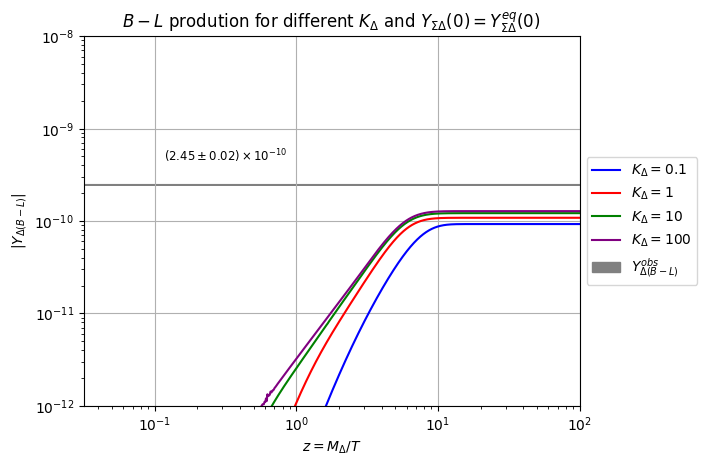

In [57]:
fig, ax = plt.subplots()
ax.plot(z_span, abs(sol_wahout_1_non_null.T[1]), color = 'blue', label = r'$K_\Delta = 0.1$')
ax.plot(z_span, abs(sol_wahout_2_non_null.T[1]), color = 'red', label = r'$K_\Delta = 1$')
ax.plot(z_span, abs(sol_wahout_3_non_null.T[1]), color = 'green', label = r'$K_\Delta = 10$')
ax.plot(z_span, abs(sol_wahout_4_non_null.T[1]), color = 'purple', label = r'$K_\Delta = 100$')
ax.fill_between(np.linspace(10**(-4),10e2,100000),2.43*10**(-10),2.47*10**(-10),color = 'gray',
             label = r'$Y_{\Delta(B-L)}^{obs}$')
ax.text(10**(-0.5),10**(-9.3),r'$(2.45\pm0.02)\times 10^{-10}$',horizontalalignment='center',
        verticalalignment='center',fontsize = 'small')
ax.set_xlabel(r'$z=M_\Delta/T$')
ax.set_ylabel(r'$|Y_{\Delta(B-L)}|$')
ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(r'$B-L$ prodution for different $K_\Delta$ and $Y_{\Sigma \Delta}(0) = Y_{\Sigma \Delta}^{eq}(0)$')
ax.set_ylim((10**(-12),10**(-8)))
ax.set_xlim((10**(-1.5),100))
ax.grid()
plt.show()
fig.savefig('B minus L for different washouts for non null initial scalar triplet.pdf', bbox_inches='tight',dpi=500)

In [58]:
#B-L abundance in terms of the of the washout parameter K for non null initial triplet abundance
Y_BminusL_K_non_null = np.zeros(len(K_span))

for i in range(len(K_span)):
    sol_wahout_i = odeint(dYk,y0=[Sigma_Delta_0,0,0],t=z_span,args=(K_span[i],1),tfirst=True,rtol=10**(-14),atol=10**(-13))
    y = abs(sol_wahout_i.T[1])
    Y_BminusL_K_non_null[i] = y[999990]

C:\Users\willb\AppData\Local\Temp\ipykernel_25992\4085598195.py:9: RuntimeWarning: overflow encountered in scalar power
  return [-Dk(z,k)*(Y[0]/Sigma_Delta_eq(z)-1)-var*A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\4085598195.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  return [-Dk(z,k)*(Y[0]/Sigma_Delta_eq(z)-1)-var*A(z)*((Y[0]/Sigma_Delta_eq(z))**2-1),
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\2044922385.py:5: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  sol_wahout_i = odeint(dYk,y0=[Sigma_Delta_0,0,0],t=z_span,args=(K_span[i],1),tfirst=True,rtol=10**(-14),atol=10**(-13))
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\3484432309.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return z*Sigma_Delta_eq(z)*k*kv(1,z)/kv(2,z)
C:\Users\willb\AppData\Local\Temp\ipykernel_25992\4085598195.py:9: RuntimeWarning: divide b

In [76]:
max_null = max(Y_BminusL_K_non_null/(10**(-8)*Sigma_Delta_0))
for i in range(len(Y_BminusL_K_non_null)):
    if Y_BminusL_K_non_null[i]/(10**(-8)*Sigma_Delta_0) == max_null:
        print('The maximum efficiency for non null initial triplet abundance is ',max_null,
              ' for K = ',K_span[i])

The maximum efficiency for non null initial triplet abundance is  0.9967934682197467  for K =  1000.0


In [77]:
max_eff = max(Y_BminusL_K/(10**(-8)*Sigma_Delta_0))
for i in range(len(Y_BminusL_K)):
    if Y_BminusL_K[i]/(10**(-8)*Sigma_Delta_0) == max_eff:
        print('The maximum efficiency for non null initial triplet abundance is ',max_eff,
              ' for K = ',K_span[i])

The maximum efficiency for non null initial triplet abundance is  0.547060768393399  for K =  0.7010693069306931


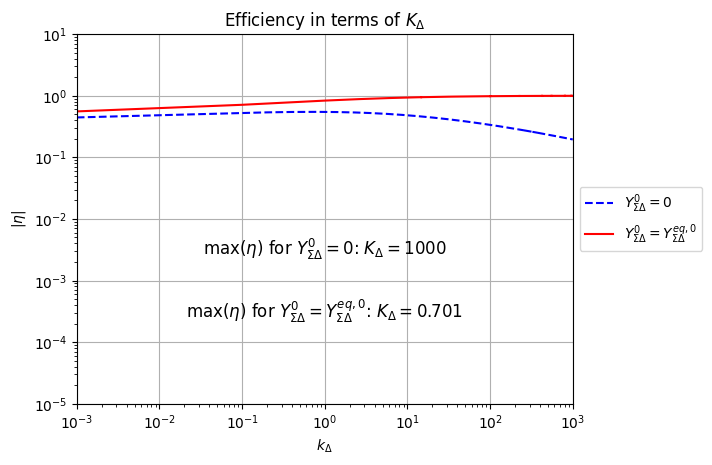

In [78]:
fig, ax = plt.subplots()
ax.plot(K_span, abs(Y_BminusL_K/(10**(-8)*Sigma_Delta_0)),'--',color = 'blue', label = r'$Y_{\Sigma \Delta}^0=0$')
ax.plot(K_span, abs(Y_BminusL_K_non_null/(10**(-8)*Sigma_Delta_0)), color = 'red', label = r'$Y_{\Sigma \Delta}^0=Y_{\Sigma \Delta}^{eq,0}$')
ax.text(10**(0),10**(-2.5),r'max($\eta$) for $Y_{\Sigma \Delta}^0=0$: $K_\Delta = 1000$',horizontalalignment='center',
        verticalalignment='center',fontsize = 'large')
ax.text(10**(0),10**(-3.5),r'max($\eta$) for $Y_{\Sigma \Delta}^0=Y_{\Sigma \Delta}^{eq,0}$: $K_\Delta = 0.701$',horizontalalignment='center',
        verticalalignment='center',fontsize = 'large')
ax.set_xlabel(r'$k_\Delta$')
ax.set_ylabel(r'$|\eta|$')
ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(r'Efficiency in terms of $K_\Delta$')
ax.set_ylim((10**(-5),10**(1)))
ax.set_xlim((10**(-3),1000))
ax.grid()
plt.show()
fig.savefig('type II efficiency.pdf', bbox_inches='tight',dpi=500)